In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv(r"D:\PythonProgramme\SalesProduct\train.csv")

In [3]:
dataset.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [13]:
dataset.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [15]:
dataset["Postal Code"].fillna(dataset["Postal Code"].mean(),inplace=True)

In [4]:
dataset.shape

(9800, 18)

In [16]:
dataset.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

# All Null Value's Filled 

# Order Date

In [78]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   object        
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [77]:
# Converting Datatypes object to Datetime
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'],format="%d-%m-%Y")

In [80]:
dataset["Year"]=dataset["Order Date"].dt.year

In [81]:
# Year Columns has Been Created
dataset.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year
0,1,CA-2017-152156,2017-11-08,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017


In [82]:
dataset["Year"].value_counts()

Year
2018    3258
2017    2534
2016    2055
2015    1953
Name: count, dtype: int64

<!-- Ship Mode -->

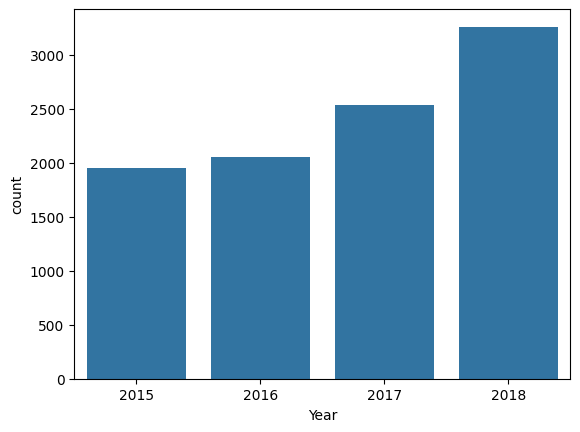

In [85]:
sns.countplot(x="Year",data=dataset)
plt.show()

<Axes: xlabel='Year', ylabel='Sales'>

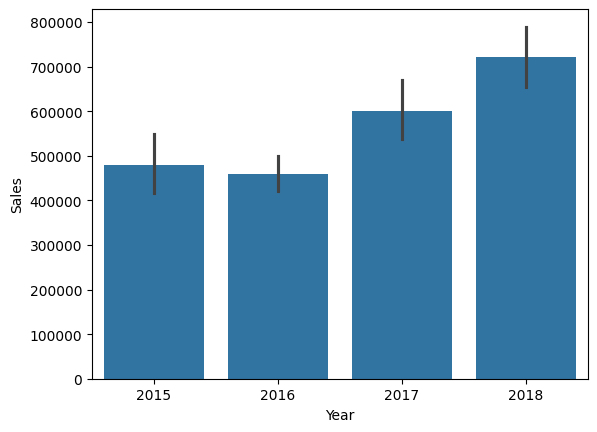

In [86]:
sns.barplot(x="Year",y="Sales",data=dataset,estimator="sum")

# Ship Mode

In [70]:
dataset["Ship Mode"].value_counts()

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

 # Let's Visualize Datset

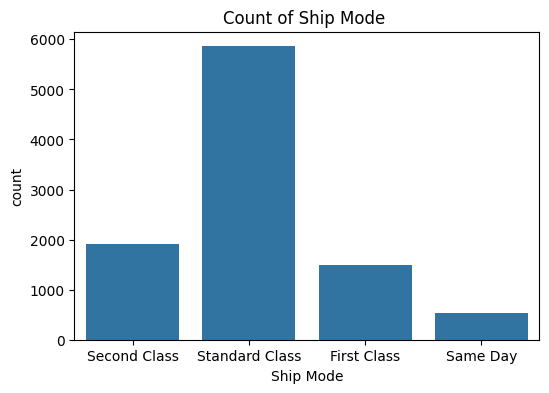

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x="Ship Mode",data=dataset)
plt.title("Count of Ship Mode ")
plt.savefig("ship mode.jpg")
plt.show()

# Segment

In [12]:
dataset["Segment"].value_counts()

Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64

In [13]:
x=dataset["Segment"].value_counts().index

In [14]:
x

Index(['Consumer', 'Corporate', 'Home Office'], dtype='object', name='Segment')

In [16]:
y=dataset["Segment"].value_counts().values

In [17]:
y

array([5101, 2953, 1746], dtype=int64)

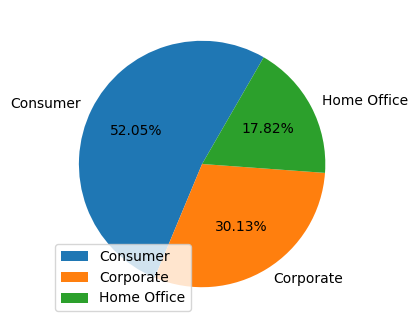

In [29]:
plt.figure(figsize=(6,4))
plt.pie(y,labels=x,autopct="%0.2f%%",startangle=60)
plt.legend(loc=3)
plt.show()

<Axes: xlabel='Segment', ylabel='count'>

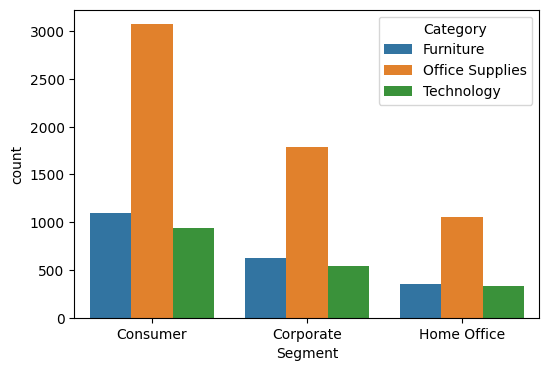

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(x="Segment",data=dataset,hue="Category")

# Product Categories 

In [32]:
dataset["Category"].value_counts()

Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64

In [33]:
x=dataset["Category"].value_counts().index
x

Index(['Office Supplies', 'Furniture', 'Technology'], dtype='object', name='Category')

In [35]:
y=dataset["Category"].value_counts().values
y

array([5909, 2078, 1813], dtype=int64)

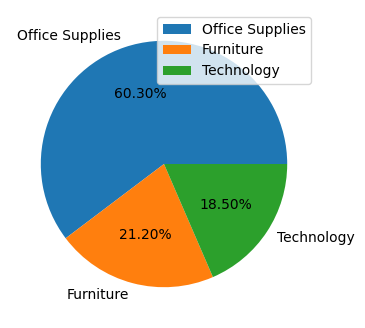

In [46]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,autopct="%0.2f%%")
plt.legend(loc=1)
plt.show()

# Sub-Category

In [47]:
dataset["Sub-Category"].value_counts()

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64

In [50]:
x=dataset["Sub-Category"].value_counts().values
x

array([1492, 1338,  931,  876,  832,  785,  756,  607,  459,  357,  314,
        248,  226,  214,  184,  115,   66], dtype=int64)

In [53]:
y=dataset["Sub-Category"].value_counts().index
y


Index(['Binders', 'Paper', 'Furnishings', 'Phones', 'Storage', 'Art',
       'Accessories', 'Chairs', 'Appliances', 'Labels', 'Tables', 'Envelopes',
       'Bookcases', 'Fasteners', 'Supplies', 'Machines', 'Copiers'],
      dtype='object', name='Sub-Category')

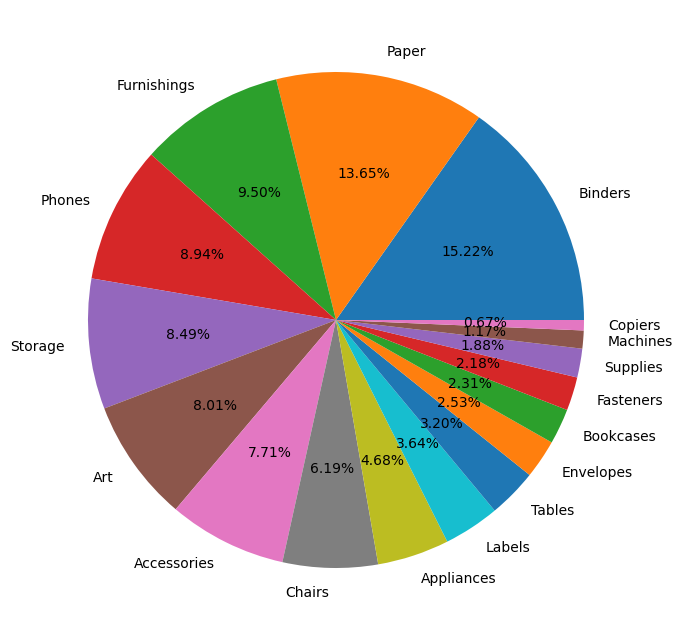

In [68]:
plt.figure(figsize=(8,15))
plt.pie(x,labels=y,autopct="%0.2f%%")
plt.show()

<Axes: xlabel='Category', ylabel='count'>

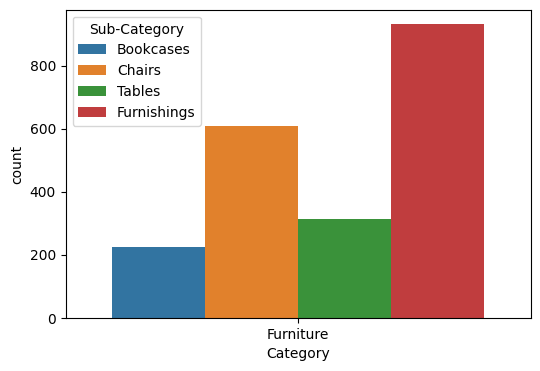

In [69]:
plt.figure(figsize=(6,4))
sns.countplot(x="Category",data=dataset[dataset["Category"]=="Furniture"],hue="Sub-Category")